In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
# venv/Scripts/Activate.ps1

In [2]:
df = pd.read_csv("tabla_de_hechos.csv")
df.drop("aux", axis=1, inplace=True)
df.rename(columns = {'Remittance inflows (US$ million)' : 'remittance',
                     'TAR (%)' : 'tar',
                     'GDP (current US$' : 'gdp',
                     'Inflation, consumer prices (annual %)' : 'inflation',
                     'Net migration' : 'net_migration'}, inplace = True)
df.sample(10)

,anio,pais,remittance,tar,gdp,inflation,net_migration
49,2017,France,24884.547856,3.384426,2.595151e+12,1.032283,13175.0
10,2022,India,111221.774722,19.642397,3.385090e+12,6.699034,NaN
0,2012,India,68820.517838,9.185404,1.827638e+12,9.478997,-180991.0
23,2013,China,59491.287194,2.529259,9.570471e+12,2.621050,-137444.0
40,2019,Philippines,35167.471832,3.862956,3.768234e+11,2.392065,-24066.0
39,2018,Philippines,33808.967986,2.955422,3.468419e+11,5.309347,-15371.0
20,2021,Mexico,54130.298399,20.786923,1.272839e+12,5.689208,-52649.0
37,2016,Philippines,31141.973475,4.311152,3.186270e+11,1.253699,79051.0
54,2022,France,30044.437807,-6.766225,2.782905e+12,5.222367,NaN
14,2015,Mexico,26233.171803,5.455270,1.171870e+12,2.720641,-82173.0


In [3]:
df_ind = df[df["pais"] == "India"]
df_ind

,anio,pais,remittance,tar,gdp,inflation,net_migration
0,2012,India,68820.517838,9.185404,1.827638e+12,9.478997,-180991.0
1,2013,India,69970.360847,1.643329,1.856721e+12,10.017878,-236387.0
2,2014,India,70388.642797,0.594246,2.039126e+12,6.665657,-310694.0
3,2015,India,68909.693353,-2.146214,2.103588e+12,4.906973,-475094.0
4,2016,India,62744.364090,-9.826108,2.294797e+12,4.948216,68119.0
5,2017,India,68967.175500,9.022860,2.651474e+12,3.328173,-219656.0
6,2018,India,78790.170929,12.467285,2.702930e+12,3.938826,-561563.0
7,2019,India,83332.078002,5.450371,2.835606e+12,3.729506,-593495.0
8,2020,India,83149.172934,-0.219972,2.671595e+12,6.623437,-34772.0
9,2021,India,89375.152218,6.966119,3.150307e+12,5.131407,-301970.0


In [4]:
df_ind = df[df["pais"] == "India"]
df_ind.loc[len(df_ind.index)] = [2023, "India", np.nan, np.nan, np.nan, np.nan, np.nan]
df_ind.loc[len(df_ind.index)] = [2024, "India", np.nan, np.nan, np.nan, np.nan, np.nan]
df_ind.loc[len(df_ind.index)] = [2025, "India", np.nan, np.nan, np.nan, np.nan, np.nan]
df_ind.set_index("anio", inplace=True)
df_ind.insert(0, "time_index", value=np.arange(len(df_ind)))
df_ind["time_index"] += df_ind["time_index"] ** 2

df_conocido_ind = df_ind.iloc[:11,:6]
df_prediccion_ind = df_ind.iloc[11:,:6]
df_conocido_mig_ind = df_ind.iloc[:10,[0,6]]
df_prediccion_mig_ind = df_ind.iloc[10:,[0,6]]

modelo_remittance_ind = smf.ols('remittance ~ time_index', data=df_conocido_ind).fit()
modelo_tar_ind = smf.ols('tar ~ time_index', data=df_conocido_ind).fit()
modelo_gdp_ind = smf.ols('gdp ~ time_index', data=df_conocido_ind).fit()
modelo_inflation_ind = smf.ols('inflation ~ time_index', data=df_conocido_ind).fit()
modelo_net_migration_ind = smf.ols('net_migration ~ time_index', data=df_conocido_mig_ind).fit()

df_prediccion_ind["remittance"] = modelo_remittance_ind.predict(df_prediccion_ind[["time_index"]])
df_prediccion_ind["tar"] = modelo_tar_ind.predict(df_prediccion_ind[["time_index"]])
df_prediccion_ind["gdp"] = modelo_gdp_ind.predict(df_prediccion_ind[["time_index"]])
df_prediccion_ind["inflation"] = modelo_inflation_ind.predict(df_prediccion_ind[["time_index"]])
df_prediccion_mig_ind["net_migration"] = modelo_net_migration_ind.predict(df_prediccion_mig_ind[["time_index"]])

df_ind = pd.concat([df_conocido_ind, df_prediccion_ind], axis=0)
df_mig_ind = pd.concat([df_conocido_mig_ind, df_prediccion_mig_ind], axis=0)
df_ind = pd.concat([df_ind, df_mig_ind], axis=1)

df_ind


C:\Users\cristian_torres\AppData\Local\Temp\ipykernel_12748\993989372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ind.loc[len(df_ind.index)] = [2023, "India", np.nan, np.nan, np.nan, np.nan, np.nan]
C:\Users\cristian_torres\AppData\Local\Temp\ipykernel_12748\993989372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ind.loc[len(df_ind.index)] = [2024, "India", np.nan, np.nan, np.nan, np.nan, np.nan]
C:\Users\cristian_torres\AppData\Local\Temp\ipykernel_12748\993989372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

,time_index,pais,remittance,tar,gdp,inflation,time_index,net_migration
anio,,,,,,,,
2012,0,India,68820.517838,9.185404,1.827638e+12,9.478997,0,-180991.000000
2013,2,India,69970.360847,1.643329,1.856721e+12,10.017878,2,-236387.000000
2014,6,India,70388.642797,0.594246,2.039126e+12,6.665657,6,-310694.000000
2015,12,India,68909.693353,-2.146214,2.103588e+12,4.906973,12,-475094.000000
2016,20,India,62744.364090,-9.826108,2.294797e+12,4.948216,20,68119.000000
2017,30,India,68967.175500,9.022860,2.651474e+12,3.328173,30,-219656.000000
2018,42,India,78790.170929,12.467285,2.702930e+12,3.938826,42,-561563.000000
2019,56,India,83332.078002,5.450371,2.835606e+12,3.729506,56,-593495.000000
2020,72,India,83149.172934,-0.219972,2.671595e+12,6.623437,72,-34772.000000


In [ ]:
df_ind = df[df["pais"] == "India"]
df_ind.loc[len(df_ind.index)] = [2023, "India", np.nan, np.nan, np.nan, np.nan, np.nan]
df_ind.loc[len(df_ind.index)] = [2024, "India", np.nan, np.nan, np.nan, np.nan, np.nan]
df_ind.loc[len(df_ind.index)] = [2025, "India", np.nan, np.nan, np.nan, np.nan, np.nan]
df_ind.set_index("anio", inplace=True)
df_ind.insert(0, "time_index", value=np.arange(len(df_ind)))
df_ind["time_index"] += df_ind["time_index"] ** 2

df_conocido_ind = df_ind.iloc[:11,:6]
df_prediccion_ind = df_ind.iloc[11:,:6]
df_conocido_mig_ind = df_ind.iloc[:10,[0,6]]
df_prediccion_mig_ind = df_ind.iloc[10:,[0,6]]

modelo_remittance_ind = smf.ols('remittance ~ time_index', data=df_conocido_ind).fit()
modelo_tar_ind = smf.ols('tar ~ time_index', data=df_conocido_ind).fit()
modelo_gdp_ind = smf.ols('gdp ~ time_index', data=df_conocido_ind).fit()
modelo_inflation_ind = smf.ols('inflation ~ time_index', data=df_conocido_ind).fit()
modelo_net_migration_ind = smf.ols('net_migration ~ time_index', data=df_conocido_mig_ind).fit()

df_prediccion_ind["remittance"] = modelo_remittance_ind.predict(df_prediccion_ind[["time_index"]])
df_prediccion_ind["tar"] = modelo_tar_ind.predict(df_prediccion_ind[["time_index"]])
df_prediccion_ind["gdp"] = modelo_gdp_ind.predict(df_prediccion_ind[["time_index"]])
df_prediccion_ind["inflation"] = modelo_inflation_ind.predict(df_prediccion_ind[["time_index"]])
df_prediccion_mig_ind["net_migration"] = modelo_net_migration_ind.predict(df_prediccion_mig_ind[["time_index"]])

df_ind = pd.concat([df_conocido_ind, df_prediccion_ind], axis=0)
df_mig_ind = pd.concat([df_conocido_mig_ind, df_prediccion_mig_ind], axis=0)
df_ind = pd.concat([df_ind, df_mig_ind], axis=1)

df_ind

In [ ]:
df_ind = df[df["pais"] == "India"]
df_ind.loc[len(df_ind.index)] = [2023, "India", np.nan, np.nan, np.nan, np.nan, np.nan]
df_ind.loc[len(df_ind.index)] = [2024, "India", np.nan, np.nan, np.nan, np.nan, np.nan]
df_ind.loc[len(df_ind.index)] = [2025, "India", np.nan, np.nan, np.nan, np.nan, np.nan]
df_ind.set_index("anio", inplace=True)
df_ind.insert(0, "time_index", value=np.arange(len(df_ind)))
df_ind["time_index"] += df_ind["time_index"] ** 2

df_conocido_ind = df_ind.iloc[:11,:6]
df_prediccion_ind = df_ind.iloc[11:,:6]
df_conocido_mig_ind = df_ind.iloc[:10,[0,6]]
df_prediccion_mig_ind = df_ind.iloc[10:,[0,6]]

modelo_remittance_ind = smf.ols('remittance ~ time_index', data=df_conocido_ind).fit()
modelo_tar_ind = smf.ols('tar ~ time_index', data=df_conocido_ind).fit()
modelo_gdp_ind = smf.ols('gdp ~ time_index', data=df_conocido_ind).fit()
modelo_inflation_ind = smf.ols('inflation ~ time_index', data=df_conocido_ind).fit()
modelo_net_migration_ind = smf.ols('net_migration ~ time_index', data=df_conocido_mig_ind).fit()

df_prediccion_ind["remittance"] = modelo_remittance_ind.predict(df_prediccion_ind[["time_index"]])
df_prediccion_ind["tar"] = modelo_tar_ind.predict(df_prediccion_ind[["time_index"]])
df_prediccion_ind["gdp"] = modelo_gdp_ind.predict(df_prediccion_ind[["time_index"]])
df_prediccion_ind["inflation"] = modelo_inflation_ind.predict(df_prediccion_ind[["time_index"]])
df_prediccion_mig_ind["net_migration"] = modelo_net_migration_ind.predict(df_prediccion_mig_ind[["time_index"]])

df_ind = pd.concat([df_conocido_ind, df_prediccion_ind], axis=0)
df_mig_ind = pd.concat([df_conocido_mig_ind, df_prediccion_mig_ind], axis=0)
df_ind = pd.concat([df_ind, df_mig_ind], axis=1)

df_ind

In [ ]:
df_ind = df[df["pais"] == "India"]
df_ind.loc[len(df_ind.index)] = [2023, "India", np.nan, np.nan, np.nan, np.nan, np.nan]
df_ind.loc[len(df_ind.index)] = [2024, "India", np.nan, np.nan, np.nan, np.nan, np.nan]
df_ind.loc[len(df_ind.index)] = [2025, "India", np.nan, np.nan, np.nan, np.nan, np.nan]
df_ind.set_index("anio", inplace=True)
df_ind.insert(0, "time_index", value=np.arange(len(df_ind)))
df_ind["time_index"] += df_ind["time_index"] ** 2

df_conocido_ind = df_ind.iloc[:11,:6]
df_prediccion_ind = df_ind.iloc[11:,:6]
df_conocido_mig_ind = df_ind.iloc[:10,[0,6]]
df_prediccion_mig_ind = df_ind.iloc[10:,[0,6]]

modelo_remittance_ind = smf.ols('remittance ~ time_index', data=df_conocido_ind).fit()
modelo_tar_ind = smf.ols('tar ~ time_index', data=df_conocido_ind).fit()
modelo_gdp_ind = smf.ols('gdp ~ time_index', data=df_conocido_ind).fit()
modelo_inflation_ind = smf.ols('inflation ~ time_index', data=df_conocido_ind).fit()
modelo_net_migration_ind = smf.ols('net_migration ~ time_index', data=df_conocido_mig_ind).fit()

df_prediccion_ind["remittance"] = modelo_remittance_ind.predict(df_prediccion_ind[["time_index"]])
df_prediccion_ind["tar"] = modelo_tar_ind.predict(df_prediccion_ind[["time_index"]])
df_prediccion_ind["gdp"] = modelo_gdp_ind.predict(df_prediccion_ind[["time_index"]])
df_prediccion_ind["inflation"] = modelo_inflation_ind.predict(df_prediccion_ind[["time_index"]])
df_prediccion_mig_ind["net_migration"] = modelo_net_migration_ind.predict(df_prediccion_mig_ind[["time_index"]])

df_ind = pd.concat([df_conocido_ind, df_prediccion_ind], axis=0)
df_mig_ind = pd.concat([df_conocido_mig_ind, df_prediccion_mig_ind], axis=0)
df_ind = pd.concat([df_ind, df_mig_ind], axis=1)

df_ind

In [ ]:
df_mex = df[df["pais"] == "Mexico"]
df_mex

In [5]:
df_chi = df[df["pais"] == "China"]
df_phl = df[df["pais"] == "Philippines"]
df_fra = df[df["pais"] == "France"]

In [6]:
df_fra

,time_index,remittance,tar,gdp,inflation,net_migration
anio,,,,,,
2012.0,0,22666.366759,-1.217282,2.683672e+12,1.954195,49080.0
2013.0,2,24412.282153,7.151791,2.811877e+12,0.863715,36552.0
2014.0,6,25358.374728,3.730888,2.855964e+12,0.507759,26585.0
2015.0,12,24066.989837,-5.365793,2.439189e+12,0.037514,18807.0
2016.0,20,24042.348847,-0.102490,2.472964e+12,0.183335,14729.0
2017.0,30,24884.547856,3.384426,2.595151e+12,1.032283,13175.0
2018.0,42,26229.274711,5.126817,2.790957e+12,1.850815,14391.0
2019.0,56,30024.725081,12.641083,2.728870e+12,1.108255,17403.0
2020.0,72,28823.157458,-4.168758,2.639009e+12,0.476499,18335.0


In [7]:
df_ind

,time_index,remittance,tar,gdp,inflation,net_migration
anio,,,,,,
2012.0,0,68820.517838,9.185404,1.827638e+12,9.478997,-180991.0
2013.0,2,69970.360847,1.643329,1.856721e+12,10.017878,-236387.0
2014.0,6,70388.642797,0.594246,2.039126e+12,6.665657,-310694.0
2015.0,12,68909.693353,-2.146214,2.103588e+12,4.906973,-475094.0
2016.0,20,62744.364090,-9.826108,2.294797e+12,4.948216,68119.0
2017.0,30,68967.175500,9.022860,2.651474e+12,3.328173,-219656.0
2018.0,42,78790.170929,12.467285,2.702930e+12,3.938826,-561563.0
2019.0,56,83332.078002,5.450371,2.835606e+12,3.729506,-593495.0
2020.0,72,83149.172934,-0.219972,2.671595e+12,6.623437,-34772.0


In [8]:
df_mex

,time_index,remittance,tar,gdp,inflation,net_migration
anio,,,,,,
2025,0,NaN,NaN,NaN,NaN,NaN
2013,2,23188.811955,-0.085547,1.274444e+12,3.806391,-101719.0
2014,6,24802.081325,6.504573,1.315356e+12,4.018616,-100413.0
2015,12,26233.171803,5.455270,1.171870e+12,2.720641,-82173.0
2016,20,28690.957406,8.566412,1.078493e+12,2.821708,33094.0
2017,30,32270.507679,11.092327,1.158912e+12,6.041457,-12438.0
2018,42,35768.416627,9.779323,1.222406e+12,4.899350,-99430.0
2019,56,39021.789685,8.337324,1.269010e+12,3.635961,-47764.0
2020,72,42878.274907,8.994031,1.090515e+12,3.396834,-9949.0


In [8]:
def prediccion(df_pais):
    df_conocido = df_pais.iloc[:11,:5]
    df_prediccion = df_pais.iloc[11:,:5]
    df_conocido_mig = df_pais.iloc[:10,[0,5]]
    df_prediccion_mig = df_pais.iloc[10:,[0,5]]

    modelo_remittance = smf.ols('remittance ~ time_index', data=df_conocido).fit()
    modelo_tar = smf.ols('tar ~ time_index', data=df_conocido).fit()
    modelo_gdp = smf.ols('gdp ~ time_index', data=df_conocido).fit()
    modelo_inflation = smf.ols('inflation ~ time_index', data=df_conocido).fit()
    modelo_net_migration = smf.ols('net_migration ~ time_index', data=df_conocido_mig).fit()

    df_prediccion["remittance"] = modelo_remittance.predict(df_prediccion[["time_index"]])
    df_prediccion["tar"] = modelo_tar.predict(df_prediccion[["time_index"]])
    df_prediccion["gdp"] = modelo_gdp.predict(df_prediccion[["time_index"]])
    df_prediccion["inflation"] = modelo_inflation.predict(df_prediccion[["time_index"]])
    df_prediccion_mig["net_migration"] = modelo_net_migration.predict(df_prediccion_mig[["time_index"]])

    df_pais = pd.concat([df_conocido, df_prediccion], axis=0)
    df_mig = pd.concat([df_conocido_mig, df_prediccion_mig], axis=0)
    df_pais = pd.concat([df_pais, df_mig], axis=1)

    return df_pais

In [9]:
for df in dfs:
    prediccion(df)

In [10]:
df_ind

,time_index,remittance,tar,gdp,inflation,net_migration
anio,,,,,,
2012.0,0,68820.517838,9.185404,1.827638e+12,9.478997,-180991.0
2013.0,2,69970.360847,1.643329,1.856721e+12,10.017878,-236387.0
2014.0,6,70388.642797,0.594246,2.039126e+12,6.665657,-310694.0
2015.0,12,68909.693353,-2.146214,2.103588e+12,4.906973,-475094.0
2016.0,20,62744.364090,-9.826108,2.294797e+12,4.948216,68119.0
2017.0,30,68967.175500,9.022860,2.651474e+12,3.328173,-219656.0
2018.0,42,78790.170929,12.467285,2.702930e+12,3.938826,-561563.0
2019.0,56,83332.078002,5.450371,2.835606e+12,3.729506,-593495.0
2020.0,72,83149.172934,-0.219972,2.671595e+12,6.623437,-34772.0


In [11]:
df_mex

,time_index,remittance,tar,gdp,inflation,net_migration
anio,,,,,,
2025,0,NaN,NaN,NaN,NaN,NaN
2013,2,23188.811955,-0.085547,1.274444e+12,3.806391,-101719.0
2014,6,24802.081325,6.504573,1.315356e+12,4.018616,-100413.0
2015,12,26233.171803,5.455270,1.171870e+12,2.720641,-82173.0
2016,20,28690.957406,8.566412,1.078493e+12,2.821708,33094.0
2017,30,32270.507679,11.092327,1.158912e+12,6.041457,-12438.0
2018,42,35768.416627,9.779323,1.222406e+12,4.899350,-99430.0
2019,56,39021.789685,8.337324,1.269010e+12,3.635961,-47764.0
2020,72,42878.274907,8.994031,1.090515e+12,3.396834,-9949.0


In [16]:
df_chi

,time_index,remittance,tar,gdp,inflation,net_migration
anio,,,,,,
2012.0,0,57986.598422,-6.190436,8.532186e+12,2.619524,-124641.0
2013.0,2,59491.287194,2.529259,9.570471e+12,2.621050,-137444.0
2014.0,6,62332.342308,4.557915,1.047562e+13,1.921642,-198432.0
2015.0,12,63937.646592,2.510734,1.106157e+13,1.437024,-155379.0
2016.0,20,60999.999488,-4.815815,1.123331e+13,2.000002,-153054.0
2017.0,30,63875.674112,4.501987,1.231049e+13,1.593136,-180592.0
2018.0,42,67413.592064,5.248078,1.389491e+13,2.074790,-296674.0
2019.0,56,68398.475114,1.439920,1.427997e+13,2.899234,-302609.0
2020.0,72,59506.673349,-14.942529,1.468774e+13,2.419422,-33649.0


In [17]:
df_phl

,time_index,remittance,tar,gdp,inflation,net_migration
anio,,,,,,
2012.0,0,24609.679613,6.322933,2.619205e+11,3.026964,-156051.0
2013.0,2,26716.840269,7.887013,2.839028e+11,2.582688,-199869.0
2014.0,6,28690.797896,6.880107,2.974836e+11,3.597823,-237890.0
2015.0,12,29799.395700,3.720202,3.064459e+11,0.674193,6954.0
2016.0,20,31141.973475,4.311152,3.186270e+11,1.253699,79051.0
2017.0,30,32809.770434,5.083233,3.284807e+11,2.853188,36111.0
2018.0,42,33808.967986,2.955422,3.468419e+11,5.309347,-15371.0
2019.0,56,35167.471832,3.862956,3.768234e+11,2.392065,-24066.0
2020.0,72,34882.844550,-0.815952,3.617511e+11,2.393162,-41937.0


In [18]:
df_fra

,time_index,remittance,tar,gdp,inflation,net_migration
anio,,,,,,
2012.0,0,22666.366759,-1.217282,2.683672e+12,1.954195,49080.0
2013.0,2,24412.282153,7.151791,2.811877e+12,0.863715,36552.0
2014.0,6,25358.374728,3.730888,2.855964e+12,0.507759,26585.0
2015.0,12,24066.989837,-5.365793,2.439189e+12,0.037514,18807.0
2016.0,20,24042.348847,-0.102490,2.472964e+12,0.183335,14729.0
2017.0,30,24884.547856,3.384426,2.595151e+12,1.032283,13175.0
2018.0,42,26229.274711,5.126817,2.790957e+12,1.850815,14391.0
2019.0,56,30024.725081,12.641083,2.728870e+12,1.108255,17403.0
2020.0,72,28823.157458,-4.168758,2.639009e+12,0.476499,18335.0


In [153]:
df_conocido = df_fra.iloc[:11,:5]
df_conocido

,time_index,remittance,tar,gdp,inflation
anio,,,,,
2012.0,0,22666.366759,-1.217282,2.683672e+12,1.954195
2013.0,2,24412.282153,7.151791,2.811877e+12,0.863715
2014.0,6,25358.374728,3.730888,2.855964e+12,0.507759
2015.0,12,24066.989837,-5.365793,2.439189e+12,0.037514
2016.0,20,24042.348847,-0.102490,2.472964e+12,0.183335
2017.0,30,24884.547856,3.384426,2.595151e+12,1.032283
2018.0,42,26229.274711,5.126817,2.790957e+12,1.850815
2019.0,56,30024.725081,12.641083,2.728870e+12,1.108255
2020.0,72,28823.157458,-4.168758,2.639009e+12,0.476499


In [154]:
df_prediccion = df_fra.iloc[11:,:5]
df_prediccion

,time_index,remittance,tar,gdp,inflation
anio,,,,,
2023.0,132,NaN,NaN,NaN,NaN
2024.0,156,NaN,NaN,NaN,NaN
2025.0,182,NaN,NaN,NaN,NaN


In [155]:
model_quadratic = smf.ols('remittance ~ time_index', data = df_conocido).fit()

In [156]:
df_prediccion["remittance"] = model_quadratic.predict(df_prediccion[["time_index"]])

In [157]:
df_prediccion

,time_index,remittance,tar,gdp,inflation
anio,,,,,
2023.0,132,33499.445371,NaN,NaN,NaN
2024.0,156,35298.593552,NaN,NaN,NaN
2025.0,182,37247.670748,NaN,NaN,NaN


In [158]:
df_fra2 = pd.concat([df_conocido, df_prediccion], axis=0)
df_fra2

,time_index,remittance,tar,gdp,inflation
anio,,,,,
2012.0,0,22666.366759,-1.217282,2.683672e+12,1.954195
2013.0,2,24412.282153,7.151791,2.811877e+12,0.863715
2014.0,6,25358.374728,3.730888,2.855964e+12,0.507759
2015.0,12,24066.989837,-5.365793,2.439189e+12,0.037514
2016.0,20,24042.348847,-0.102490,2.472964e+12,0.183335
2017.0,30,24884.547856,3.384426,2.595151e+12,1.032283
2018.0,42,26229.274711,5.126817,2.790957e+12,1.850815
2019.0,56,30024.725081,12.641083,2.728870e+12,1.108255
2020.0,72,28823.157458,-4.168758,2.639009e+12,0.476499


---

In [163]:
df_conocido2 = df_fra.iloc[:10,[0,5]]
df_prediccion2 = df_fra.iloc[10:,[0,5]]
df_prediccion2

,time_index,net_migration
anio,,
2022.0,110,NaN
2023.0,132,NaN
2024.0,156,NaN
2025.0,182,NaN


In [164]:
model_quadratic2 = smf.ols('net_migration ~ time_index', data = df_conocido2).fit()

df_prediccion2["net_migration"] = model_quadratic.predict(df_prediccion2[["time_index"]])

df_fra3 = pd.concat([df_conocido2, df_prediccion2], axis=0)
df_fra3

,time_index,net_migration
anio,,
2012.0,0,49080.000000
2013.0,2,36552.000000
2014.0,6,26585.000000
2015.0,12,18807.000000
2016.0,20,14729.000000
2017.0,30,13175.000000
2018.0,42,14391.000000
2019.0,56,17403.000000
2020.0,72,18335.000000


In [165]:
df_fra4 = pd.concat([df_fra2, df_fra3], axis=1)
df_fra4

,time_index,remittance,tar,gdp,inflation,time_index,net_migration
anio,,,,,,,
2012.0,0,22666.366759,-1.217282,2.683672e+12,1.954195,0,49080.000000
2013.0,2,24412.282153,7.151791,2.811877e+12,0.863715,2,36552.000000
2014.0,6,25358.374728,3.730888,2.855964e+12,0.507759,6,26585.000000
2015.0,12,24066.989837,-5.365793,2.439189e+12,0.037514,12,18807.000000
2016.0,20,24042.348847,-0.102490,2.472964e+12,0.183335,20,14729.000000
2017.0,30,24884.547856,3.384426,2.595151e+12,1.032283,30,13175.000000
2018.0,42,26229.274711,5.126817,2.790957e+12,1.850815,42,14391.000000
2019.0,56,30024.725081,12.641083,2.728870e+12,1.108255,56,17403.000000
2020.0,72,28823.157458,-4.168758,2.639009e+12,0.476499,72,18335.000000


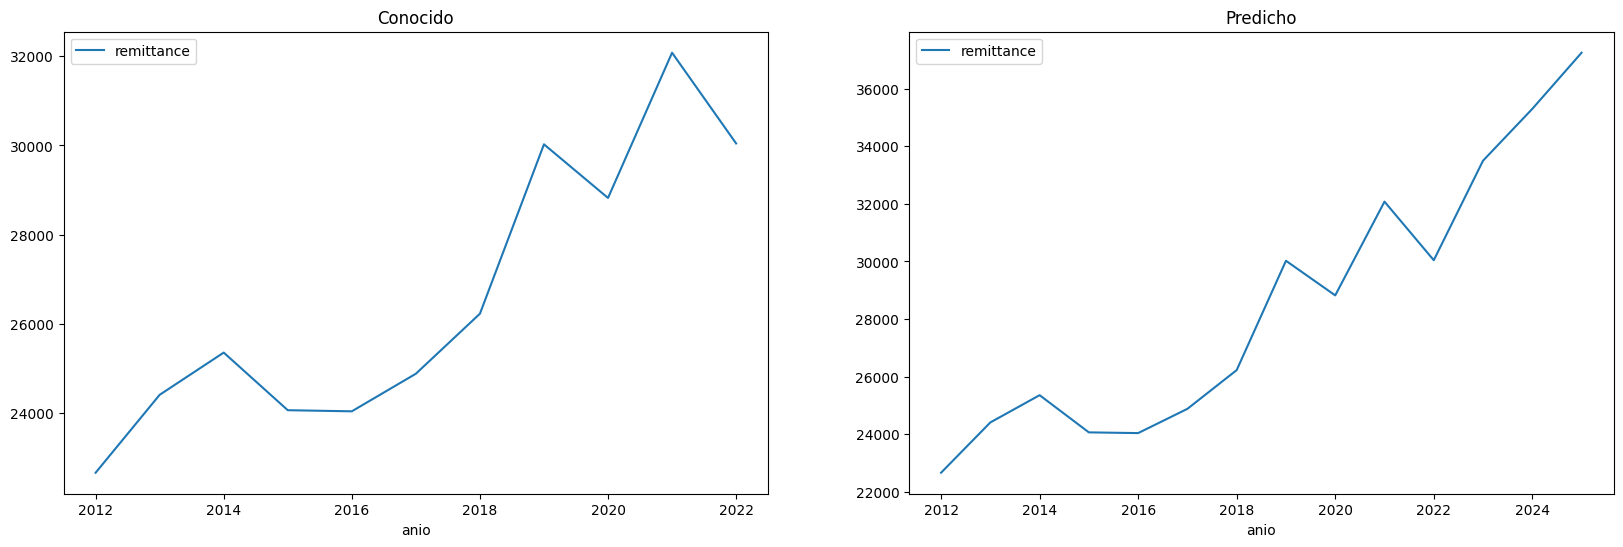

In [124]:
fig, axes = plt.subplots(1, 2,figsize=(20,6))
df_fra.plot(kind = "line", y = ["remittance"],ax=axes[0],title='Conocido');
df_fra2.plot(kind = "line", y = ["remittance"],ax=axes[1],title='Predicho');
plt.show()

In [129]:
df_prediccion.loc[2022] = df_conocido.loc[2022]
df_prediccion.sort_index(inplace=True)
df_prediccion

C:\Users\cristian_torres\AppData\Local\Temp\ipykernel_13800\3379795522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prediccion.sort_index(inplace=True)


,time_index,remittance
anio,,
2022.0,110.0,30044.437807
2023.0,132.0,33499.445371
2024.0,156.0,35298.593552
2025.0,182.0,37247.670748


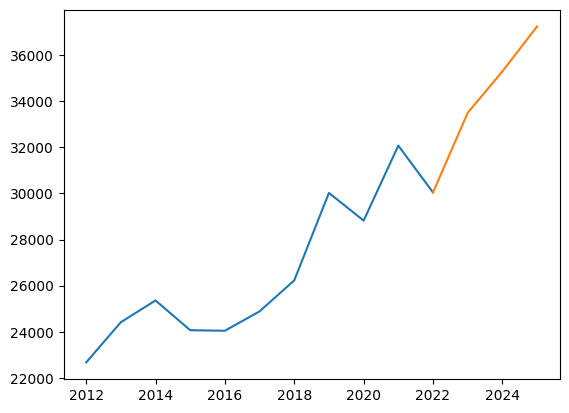

In [130]:
plt.plot(df_conocido["remittance"])
plt.plot(df_prediccion["remittance"])
plt.show()

In [ ]:
df_ind.set_index("anio", inplace=True)
df_ind["timeIndex"] = pd.Series(np.arange(len(df_ind)), index=df_ind.index)
df_ind["timeIndex"] = df_ind["timeIndex" ** 2]

df_mex = df[df["pais"] == "Mexico"]
df_mex.set_index("anio", inplace=True)
df_mex["timeIndex"] = pd.Series(np.arange(len(df_mex)), index=df_mex.index)
df_ind["timeIndex"] = df_ind["timeIndex" ** 2]

df_chi = df[df["pais"] == "China"]
df_chi.set_index("anio", inplace=True)
df_chi["timeIndex"] = pd.Series(np.arange(len(df_chi)), index=df_chi.index)
df_ind["timeIndex"] = df_ind["timeIndex" ** 2]

df_phl = df[df["pais"] == "Philippines"]
df_phl.set_index("anio", inplace=True)
df_phl["timeIndex"] = pd.Series(np.arange(len(df_phl)), index=df_phl.index)
df_ind["timeIndex"] = df_ind["timeIndex" ** 2]

df_fra = df[df["pais"] == "France"]
df_fra.set_index("anio", inplace=True)
df_fra["timeIndex"] = pd.Series(np.arange(len(df_fra)), index=df_fra.index)
df_ind["timeIndex"] = df_ind["timeIndex" ** 2]

In [33]:
df_ind = df.loc[df["pais"] == "India"]
df_ind.set_index("anio", inplace=True)
df_ind.insert(0, "timeIndex", value=np.arange(len(df_ind)))
df_ind["timeIndex"] = df_ind["timeIndex"] ** 2
df_ind
#df.insert(idx, 'index', value=np.arange(len(df)))

C:\Users\cristian_torres\AppData\Local\Temp\ipykernel_13800\66813598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ind["timeIndex"] = df_ind["timeIndex"] ** 2


,timeIndex,pais,Remittance inflows (US$ million),aux,TAR (%),GDP (current US$,"Inflation, consumer prices (annual %)",Net migration
anio,,,,,,,,
2012,0,India,68820.517838,2012India,9.185404,1.827638e+12,9.478997,-180991.0
2013,1,India,69970.360847,2013India,1.643329,1.856721e+12,10.017878,-236387.0
2014,4,India,70388.642797,2014India,0.594246,2.039126e+12,6.665657,-310694.0
2015,9,India,68909.693353,2015India,-2.146214,2.103588e+12,4.906973,-475094.0
2016,16,India,62744.364090,2016India,-9.826108,2.294797e+12,4.948216,68119.0
2017,25,India,68967.175500,2017India,9.022860,2.651474e+12,3.328173,-219656.0
2018,36,India,78790.170929,2018India,12.467285,2.702930e+12,3.938826,-561563.0
2019,49,India,83332.078002,2019India,5.450371,2.835606e+12,3.729506,-593495.0
2020,64,India,83149.172934,2020India,-0.219972,2.671595e+12,6.623437,-34772.0


In [21]:
import statsmodels.formula.api as smf
model_quadratic = smf.ols('Ventas ~ timeIndex + timeIndex_sq', data = df_train).fit()

C:\Users\cristian_torres\AppData\Local\Temp\ipykernel_13800\3961114753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phl["timeIndex"] = pd.Series(np.arange(len(df_phl)), index=df_phl.index)


anio
2012    0
2013    1
2014    2
Name: timeIndex, dtype: int32